In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
# Call the search_images_ddg function to search for images related to the query 'watermelon photos',

# and limit the number of images retrieved to 1 using the max_images parameter.

urls = search_images_ddg('watermelon photos', max_images = 1)

# Calculate the length of the urls list, which represents the number of URLs retrieved from the search,
# and return the URL at index 0.
# This returns a tuple where the first element is the number of URLs retrieved,
# and the second element is the URL itself
len(urls),urls[0]

# Define the destination file path as "watermelon.jpg"
dest = Path('watermelon.jpg')

# If "watermelon.jpg" does not already exist in the destination folder, download the image from urls[0] and save it as "watermelon.jpg"
if not dest.exists():
    download_url(urls[0], dest, show_progress=False)




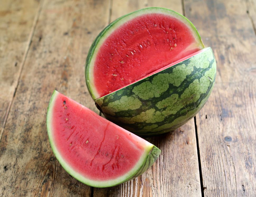

In [3]:
# Open the image file "watermelon.jpg" from the specified destination folder
im = Image.open(dest)

# Resize the image to a thumbnail with dimensions of 256x256 pixels
im.to_thumb(256, 256)

In [4]:

urls = search_images_ddg('Grape photos', max_images = 1)

# Calculate the length of the urls list, which represents the number of URLs retrieved from the search,
# and return the URL at index 0.
# This returns a tuple where the first element is the number of URLs retrieved,
# and the second element is the URL itself
len(urls),urls[0]

# Define the destination file path as "grape.jpg"
dest = Path('grape.jpg')

# If "grape.jpg" does not already exist in the destination folder, download the image from urls[0] and save it as "grape.jpg"
if not dest.exists():
    download_url(urls[0], dest, show_progress=False)


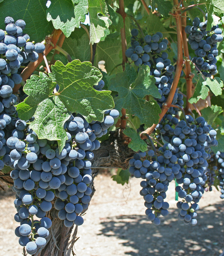

In [5]:
# Open the image file "grape.jpg" from the specified destination folder
im = Image.open(dest)

# Resize the image to a thumbnail with dimensions of 256x256 pixels
im.to_thumb(256, 256)

In [6]:

urls = search_images_ddg('Banana photos', max_images = 1)

# Calculate the length of the urls list, which represents the number of URLs retrieved from the search,
# and return the URL at index 0.
# This returns a tuple where the first element is the number of URLs retrieved,
# and the second element is the URL itself
len(urls),urls[0]

# Define the destination file path as "banana.jpg"
dest = Path('banana.jpg')

# If "banana.jpg" does not already exist in the destination folder, download the image from urls[0] and save it as "banana.jpg"
if not dest.exists():
    download_url(urls[0], dest, show_progress=False)

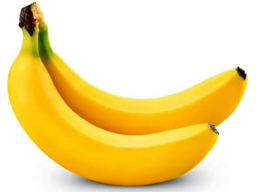

In [7]:
# Open the image file "banana.jpg" from the specified destination folder
im = Image.open(dest)

# Resize the image to a thumbnail with dimensions of 256x256 pixels
im.to_thumb(256, 256)

In [8]:

searches = ['Watermelon', 'Grape', 'Banana']
path = Path('Fruits')


if not path.exists():
    for o in searches:
        dest = (path/o)
        dest.parent.mkdir(parents=True, exist_ok=True) 
     
        dest.mkdir(exist_ok=True)  # Create the subdirectory
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:100])
        resize_images(dest, max_size=400, dest = dest)
       

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

# Define a DataBlock object to configure how the data should be loaded and preprocessed
dls = DataBlock(
    # Specify the types of data blocks to be used
    blocks=(ImageBlock, CategoryBlock),
    # Function to get the items (image files) from the provided path
    get_items=get_image_files,
    # Split the data into training and validation sets using RandomSplitter
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # Function to get the label for each item (in this case, the parent directory's name)
    get_y=parent_label,
    # List of item transformations to be applied (resize images to 192x192 pixels)
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)  # Load the data from the specified path



In [9]:
# Create a CNN learner object
learn = vision_learner(
    dls,         # DataLoaders object containing training and validation data
    resnet18,    # Pre-trained ResNet-18 model architecture
    metrics=error_rate  # Evaluation metric (error rate)
)

# Fine-tune the pre-trained model
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.760923,0.845736,0.169811,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.568885,0.630338,0.150943,00:09
1,0.404603,0.484545,0.113208,00:09
2,0.288379,0.414283,0.113208,00:09


Probability it's a watermelon: 1.0000


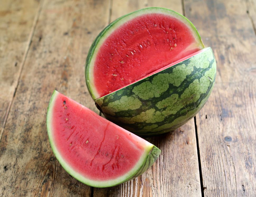

In [15]:
is_watermelon,_,probs = learn.predict(PILImage.create('watermelon.jpg'))

print(f"Probability it's a watermelon: {probs[2]:.4f}")
## probs[2] is watermelon 

b = Path('watermelon.jpg')
im = Image.open(b)

# Resize the image to a thumbnail with dimensions of 256x256 pixels
im.to_thumb(256, 256)

Probability it's a grape: 1.0000


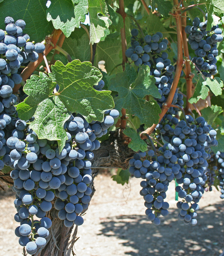

In [16]:
is_grape,_,probs = learn.predict(PILImage.create('grape.jpg'))
print(f"Probability it's a grape: {probs[1]:.4f}")
## probs[1] is grapes 

# Open the image file "grape.jpg" from the specified destination folder
im = Image.open('grape.jpg')

# Resize the image to a thumbnail with dimensions of 256x256 pixels
im.to_thumb(256, 256)

Probability it's a banana: 0.9994


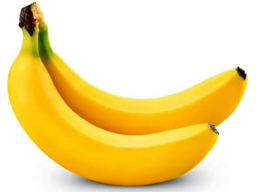

In [17]:
is_banana,_,probs = learn.predict(PILImage.create('banana.jpg'))
print(f"Probability it's a banana: {probs[0]:.4f}")
## probs[0] is Banana 

# Open the image file "banana.jpg" from the specified destination folder
im = Image.open('banana.jpg')

# Resize the image to a thumbnail with dimensions of 256x256 pixels
im.to_thumb(256, 256)

Probability it's a banana: 0.0000


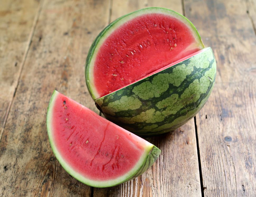

In [18]:
## showing the model that something isn't a banana

is_banana,_,probs = learn.predict(PILImage.create('watermelon.jpg'))
print(f"Probability it's a banana: {probs[0]:.4f}")
## probs[0] is Banana 

# Open the image file "watermelon.jpg" from the specified destination folder
im = Image.open('watermelon.jpg')

# Resize the image to a thumbnail with dimensions of 256x256 pixels
im.to_thumb(256, 256)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(10, nrows = 3)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner